<a href="https://colab.research.google.com/github/Chromis07/dataStudy/blob/main/ML/Keras/%ED%8F%90%EC%95%94_%EC%88%98%EC%88%A0_%ED%99%98%EC%9E%90%EC%9D%98_%EC%83%9D%EC%A1%B4%EC%9C%A0%EB%AC%B4_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

폐암 수술 환자의 생존유무 예측하기 (1: 생존, 0, 사망)

In [7]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# 랜덤시드 고정
np.random.seed(5)

In [8]:
dataset = np.loadtxt('/content/ThoraricSurgery.csv', delimiter = ',')
dataset.shape

(470, 18)

데이터셋 생성하기 - 입력(속성값 17개; 문제집), 출력(판정결과 1개; 정답지) 변수로 분리 

In [9]:
# 학습 데이터 700개 and 8 변수 가져오기
X_train = dataset[:420,0:17]
y_train = dataset[:420, 17]

# 테스트 데이터 68개 and 1 변수 가져오기
X_test = dataset[420:, 0:17]
y_test = dataset[420:, 17]

X_train

array([[293.  ,   1.  ,   3.8 , ...,   1.  ,   0.  ,  62.  ],
       [  1.  ,   2.  ,   2.88, ...,   1.  ,   0.  ,  60.  ],
       [  8.  ,   2.  ,   3.19, ...,   1.  ,   0.  ,  66.  ],
       ...,
       [188.  ,   4.  ,   3.28, ...,   1.  ,   0.  ,  62.  ],
       [190.  ,   4.  ,   4.92, ...,   1.  ,   0.  ,  60.  ],
       [200.  ,   4.  ,   2.44, ...,   1.  ,   0.  ,  72.  ]])

모델 구성하기

In [10]:
model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu')) # 변수가 17개, relu 활성함수
model.add(Dense(20, activation='relu')) # 퍼셉트론을 점점 줄여줌
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 이진 분류이기 때문에 시그모이드 사용

모델 학습과정 설정하기

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc']) # accuracy

모델 학습하기

In [12]:
history = model.fit(X_train, y_train, 
                     epochs=100, 
                     batch_size=64)

Epoch 1/100
7/7 [==============================] - 14s 3ms/step - loss: 4.5561 - acc: 0.2015
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 1.0276 - acc: 0.6082
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 1.0107 - acc: 0.6699
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.9733 - acc: 0.6692
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7577 - acc: 0.6488
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6271 - acc: 0.7289
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6153 - acc: 0.7415
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5933 - acc: 0.7679
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5154 - acc: 0.8162
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4782 - acc: 0.8694
Epoch 11/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4872

학습 결과 그려보기

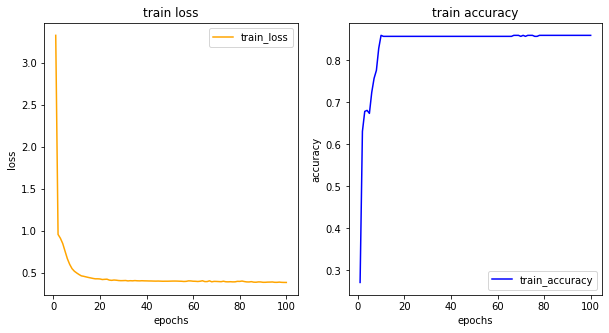

In [13]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

모델 평가하기

In [14]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) # 0에는 손실값이 들어있기 때문에 1

2/2 [==============================] - 1s 10ms/step - loss: 0.5322 - acc: 0.8000
acc: 80.00%


모델 성능 평가

In [15]:
# ROC
def plot_auc_roc(model):
    probs = model.predict_classes(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

모델 예측하기

In [16]:
# 모델 예측하기
result = model.predict_classes(X_test) # 쓰레스홀드가 잘못 성정되어 있다면 잘못 예측할 가능성이 있기 때문에 predict_classes는 오류 줄 수 있음

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [17]:
from sklearn import metrics
report = metrics.classification_report(y_test, result)
print(report)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        40
         1.0       0.00      0.00      0.00        10

    accuracy                           0.80        50
   macro avg       0.40      0.50      0.44        50
weighted avg       0.64      0.80      0.71        50



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print(metrics.precision_score(y_test, result))
print(metrics.recall_score(y_test, result))

0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


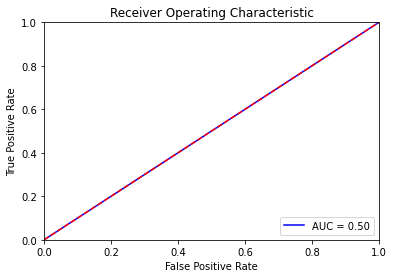

In [19]:
plot_auc_roc(model)